# Summary

<p>
The main focus here is <b>probability calculus</b> for solving problems.<br>
The central idea is that calculating probabilities requires an understanding of the events involved and this is more important than the actual mechanical calculations.<br>
For example are the events independent (mutually exclusive) or dependent?<br>
Are the events occurring simultaenously or not, conditional or not?<br>
The probability laws are structuring the understanding of probability
and point to the Bayes' theorem.
</p> 

<p>
However even before probability calculus tools like random number generation
and combinatorics are very helpful for setting the ground and working with problems.
</p> 

<p>    
The project here covers topics like:
</p> 

<p>
<ul>
  <li>Random numbers generation</li>
  <li>Combinations and permutations</li>
  <li>Joint probabilities</li>
  <li>Conditional probabilities</li>
  <li>Total Probability</li>
  <li>Bayes theorem</li>
</ul>
</p> 

## Install packages

In [731]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import collections
import statistics
import scipy.stats as stats
import math

import itertools
from itertools import combinations_with_replacement
from itertools import combinations
from itertools import permutations

### Random numbers generation

<p>
Before starting with probability experiments random numbers are needed.
Carefully conducted observations can give these numbers or Python offers
numerous number generation functions. Below are only some of those tuned
for Bernoulli experiments.
</p> 


In [732]:
int_1 = np.random.randint(2, size=10)
print(int_1)

[0 0 1 0 1 1 1 1 1 1]


Gathering more info on the generated numbers.

In [733]:
print(type(int_1))
print(np.shape(int_1))

<class 'numpy.ndarray'>
(10,)


In [734]:
np.unique(int_1)

array([0, 1])

A shortcut for finding the number of unique values.

In [735]:
stats.find_repeats(int_1)

RepeatedResults(values=array([0., 1.]), counts=array([3, 7], dtype=int64))

"np.random.rand" generates a uniform distribution between 0 and 1.
This is good for generating probabilities.

In [736]:
# generates a uniform distribution between 0 and 1
random_floats1 = np.random.rand(10)

print(random_floats1)
print(np.shape(random_floats1))
print(random_floats1)
print(np.unique(random_floats1))
print(stats.find_repeats(random_floats1))

[0.44805886 0.34941852 0.30649525 0.8967194  0.24564391 0.06353442
 0.69622234 0.72777047 0.98804057 0.9765814 ]
(10,)
[0.44805886 0.34941852 0.30649525 0.8967194  0.24564391 0.06353442
 0.69622234 0.72777047 0.98804057 0.9765814 ]
[0.06353442 0.24564391 0.30649525 0.34941852 0.44805886 0.69622234
 0.72777047 0.8967194  0.9765814  0.98804057]
RepeatedResults(values=array([], dtype=float64), counts=array([], dtype=int64))


In [737]:
choice_1 = np.random.choice(2,10)

print(type(choice_1))
print(np.shape(choice_1))
print(choice_1)
print(np.unique(choice_1))
print(stats.find_repeats(choice_1))

<class 'numpy.ndarray'>
(10,)
[0 0 1 0 0 1 1 1 0 1]
[0 1]
RepeatedResults(values=array([0., 1.]), counts=array([5, 5], dtype=int64))


In [738]:
# size 2dim array 10 rows, 2 cols
choice_2 = np.random.choice(2, size=(10,2))

print(type(choice_2 ))
print(np.shape(choice_2 ))
print(choice_2 )
print(np.unique(choice_2))
print(stats.find_repeats(choice_2))

<class 'numpy.ndarray'>
(10, 2)
[[1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]]
[0 1]
RepeatedResults(values=array([0., 1.]), counts=array([13,  7], dtype=int64))


Specially created for binomial experiments.<br>
P = 0.5 is a fair coin. Both 0 an 1 are likely equal outcomes.

In [739]:
binom_n1 = stats.binom.rvs(n=1, p=0.5, size=10000)
print(binom_n1[:50])

[1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1
 1 1 1 0 1 1 1 0 0 1 1 1 0]


In [740]:
print(type(binom_n1))
print(np.shape(binom_n1 ))
print(binom_n1)
print(stats.find_repeats(binom_n1))

<class 'numpy.ndarray'>
(10000,)
[1 1 1 ... 1 1 0]
RepeatedResults(values=array([0., 1.]), counts=array([5058, 4942], dtype=int64))


In [741]:
# help(stats.find_repeats)

<b>Relative frequencies</b><br>
Frequency relative to total numbers n:

In [742]:
pd.Series(binom_n1).value_counts()

0    5058
1    4942
dtype: int64

In [743]:
rel_11 = 6/10
print(rel_11)

rel_01 = 4/10
print(rel_01)

0.6
0.4


<p>
Determining relative frequencies  as building blocks
for probability calculations.
</p> 
<p>
This is a random sample from 0 to 3 representing of two coin flips:
(0,0): head / head = 0; (1,1): tail / tail = 1; (1/0): tail / head = 2, (0,1): head / tail = 3
</p> 


In [744]:
sample_2coins = stats.binom.rvs(n=3, p=0.5, size=10000)
print(sample_2coins[:10])

[2 2 2 1 0 2 1 3 1 0]


In [745]:
print(stats.find_repeats(sample_2coins))
print(stats.find_repeats(sample_2coins).counts)

RepeatedResults(values=array([0., 1., 2., 3.]), counts=array([1256, 3719, 3684, 1341], dtype=int64))
[1256 3719 3684 1341]


In [746]:
samp2_0 = stats.find_repeats(sample_2coins).counts[0]
samp2_1 = stats.find_repeats(sample_2coins).counts[1]
samp2_2 = stats.find_repeats(sample_2coins).counts[2]
samp2_3 = stats.find_repeats(sample_2coins).counts[3]

print(samp2_3)

1341


In [747]:
# calculating the probas of the possibilities based on the generated sample
samp2_freq = [samp2_0, samp2_1 , samp2_2, samp2_3]
samp2_proba = {}

for k,i in enumerate(samp2_freq):
    proba = i/10000
    samp2_proba[k] = proba

print(samp2_proba)
print(np.sum(list(samp2_proba.values())))

{0: 0.1256, 1: 0.3719, 2: 0.3684, 3: 0.1341}
1.0


Python offers a function to calculate the relative frequencises (relfreq).

In [748]:
rel_n1 = stats.relfreq(binom_n1, numbins=2)

print(rel_n1)
print(rel_n1.frequency)


RelfreqResult(frequency=array([0.5058, 0.4942]), lowerlimit=-0.5, binsize=1.0, extrapoints=0)
[0.5058 0.4942]


In [749]:
# help(stats.relfreq)

In [750]:
rel_n1_x = (rel_n1.lowerlimit) + \
            np.linspace(start=0, 
            stop=rel_n1.binsize*rel_n1.frequency.size, 
            num=rel_n1.frequency.size)

print(rel_n1_x)

[-0.5  1.5]


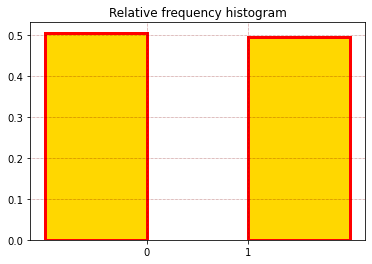

In [751]:
fig = plt.figure(figsize=(6, 4))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color='maroon', linestyle=':', linewidth=0.5)

ax.bar(rel_n1_x, rel_n1.frequency, 
       width=rel_n1.binsize, edgecolor="red", linewidth=3, color="gold")
ax.set_title('Relative frequency histogram')
# ax.set_xlim([rel_n1_x.min(), rel_n1_x.max()])
ax.set_xticks(ticks=[0,1], minor=False)

plt.savefig("Relative freq 1")
plt.show()

Because of the law of large numbers after 10.000 trials the outcome proportians are relatively equal.

In [752]:
# binomial but not Bernoulli
binom_n2 = stats.binom.rvs(n=10, p=0.5, size=10000)
print(binom_n2[:20])

[4 5 7 6 4 8 6 4 5 6 4 5 6 5 7 7 6 2 5 4]


In [753]:
print(stats.find_repeats(binom_n2))

RepeatedResults(values=array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), counts=array([  13,   85,  456, 1169, 2022, 2471, 2029, 1204,  425,  114,   12],
      dtype=int64))


In [754]:
rel_n2 =  stats.relfreq(binom_n2, 10)
print(rel_n2)
print(rel_n2.frequency.size)

RelfreqResult(frequency=array([0.0013, 0.0085, 0.0456, 0.1169, 0.2022, 0.45  , 0.1204, 0.0425,
       0.0114, 0.0012]), lowerlimit=-0.5555555555555556, binsize=1.1111111111111112, extrapoints=0)
10


In [755]:
print(rel_n1.frequency.size)
print(rel_n1.frequency)
print(rel_n1.lowerlimit)
print(rel_n1.binsize)

2
[0.5058 0.4942]
-0.5
1.0


In [756]:
rel_n2_x = (rel_n2.lowerlimit) + \
            np.linspace(start=0, 
            stop=rel_n2.binsize*rel_n2.frequency.size, 
            num=rel_n2.frequency.size)
rel_n2_x

array([-0.55555556,  0.67901235,  1.91358025,  3.14814815,  4.38271605,
        5.61728395,  6.85185185,  8.08641975,  9.32098765, 10.55555556])

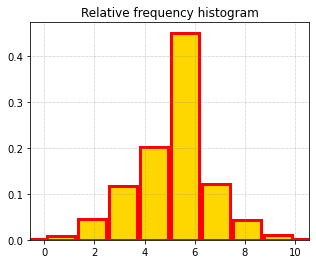

In [757]:
fig = plt.figure(figsize=(5, 4))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color='gray', linestyle=':', linewidth=0.5)

ax.bar(rel_n2_x, rel_n2.frequency, 
       width=rel_n2.binsize, edgecolor="red", linewidth=3, color="gold")
ax.set_title('Relative frequency histogram')
ax.set_xlim([rel_n2_x.min(), rel_n2_x.max()])

plt.savefig("Relative freq 2")
plt.show()

Repeat the experiment with a biased coin.

In [758]:
binom_n2 = stats.binom.rvs(n=1, p=0.3, size=100000)
print(binom_n2[:100])
print(len(binom_n2))

[0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0]
100000


In [759]:
print(type(binom_n2 ))
print(np.shape(binom_n2 ))
print(stats.find_repeats(binom_n2))

<class 'numpy.ndarray'>
(100000,)
RepeatedResults(values=array([0., 1.]), counts=array([70192, 29808], dtype=int64))


In [760]:
rel_biased_1 = stats.relfreq(binom_n2)
print(rel_biased_1 )

RelfreqResult(frequency=array([0.70192, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.29808]), lowerlimit=-0.05555555555555555, binsize=0.11111111111111112, extrapoints=0)


In [761]:
pd.Series(binom_n2).value_counts(normalize=True)

0    0.70192
1    0.29808
dtype: float64

In [762]:
rel_biased_1_x = (rel_biased_1.lowerlimit) + \
                    np.linspace(start=0, 
                    stop=rel_biased_1.binsize*rel_biased_1.frequency.size, 
                    num=rel_biased_1.frequency.size)
rel_biased_1_x

array([-0.05555556,  0.06790123,  0.19135802,  0.31481481,  0.4382716 ,
        0.5617284 ,  0.68518519,  0.80864198,  0.93209877,  1.05555556])

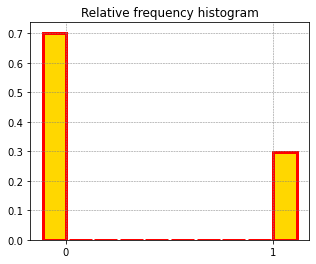

In [763]:
fig = plt.figure(figsize=(5, 4))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color='gray', linestyle='--', linewidth=0.5)

ax.bar(rel_biased_1_x, rel_biased_1.frequency, 
       width=rel_biased_1.binsize, edgecolor="red", linewidth=3, color="gold")
ax.set_title('Relative frequency histogram')
ax.set_xticks([0,1])

# ax.set_xlim([rel_biased_1_x.min(), rel_biased_1_x.max()])

plt.savefig("Relative freq 3")
plt.show()

Because the coin is biased even after 100.000  throws or trial the coin is loop sided.

## Understanding combinations and permutations

<p>
before calculating probabilities it helps determining the number of
of possible calculations by determining the number of possible
combinations. Before the number of cases can be determined some
decisions depending on the goal are necessary. For example
is the order important or not. If the order is a important it is
permutation problem and if not a combination problem. Then
is repetition allowed or not? Are the numbers repeatedly available
for combinations (with replacement) or excluded once used (without replacement)?
If you simply want to know the number of cases it is a permutation with repetition.
</p> 

<p>
<a href="https://www.mathsisfun.com/combinatorics/combinations-permutations.html" target="_blank">Math is fun</a> 
</p> 

<p>
If you simply want to know the number of cases it is a <b>permutation with repetition</b>.
</p> 


In [764]:
# 15 numbers (n) are given and we choose combinations of 5 (k)
# n choose k

print(np.power(15,5))

print(np.power(5,2))

# In the Bernoulli case it is:
print(np.power(2,2))


759375
25
4


Mostly factorials are used for calculations.<br>
Here for <b>permutations without repetition</b>.

In [765]:
print(math.factorial(int(5)))
print(5*4*3*2)

print(math.factorial(int(2)))
print(2*1)

120
120
2
2


In [766]:
def permu_wh_rep(n,k):
    perm_23 = (math.factorial(int(n)) / (math.factorial(int(n)-k)))
    return perm_23

In [767]:
# only combinations of 3 out of 5
per_531 = (math.factorial(int(5)) / (math.factorial(int(5)-3)))
print(per_531)

per_532 = permu_wh_rep(5,3)
print(per_532)

60.0
60.0


<p>
There are four different possibilities for calculating coin flips.
What if we want to display the actual possibilities?
</p> 

<p>
Python <b>itertools</b> offers a number of functions to show
combinations and permutations.<br>
<a href="https://www.tutorialspoint.com/permutation-and-combination-in-python" target="_blank">Permutation and Combination in Python</a>     
</p> 

<p>
<b>Combinations without repetition (replacement - binomial coefficient)</b> 
</p> 

In [768]:
# from n = 5 elements choose k=3 combinations
# given this limitation 10 combinations are possible
comb_53 = math.factorial(int(5)) / (math.factorial(int(3))*math.factorial(int(5-3)))
print(comb_53)

comb_22 = math.factorial(int(2)) / (math.factorial(int(2))*math.factorial(int(2-2)))
print(comb_22)

10.0
1.0


In [769]:
def comb_without_rep(n,k):
    
    comb_without_rep = \
    math.factorial(int(n)) / (math.factorial(int(k))*math.factorial(int(n-k)))
    
    return comb_without_rep
    

In [770]:
comb_wrep_124 = comb_without_rep(n=12,k=4)
print(comb_wrep_124)

495.0


In [771]:
#order does not matter, every element processed only one time
combi_noneReplace_1 = combinations([1,2,3,4,5], 3)

[c for c in enumerate(list(combi_noneReplace_1 ),1)]

[(1, (1, 2, 3)),
 (2, (1, 2, 4)),
 (3, (1, 2, 5)),
 (4, (1, 3, 4)),
 (5, (1, 3, 5)),
 (6, (1, 4, 5)),
 (7, (2, 3, 4)),
 (8, (2, 3, 5)),
 (9, (2, 4, 5)),
 (10, (3, 4, 5))]

In [772]:
#order does not matter, every element processed only one time
combi_noneReplace_2 = combinations([1,2], 2)

#Print the list of combinations
[c for c in enumerate(list(combi_noneReplace_2),1)]



[(1, (1, 2))]

<p>
<b>Combinations with repetition (replacement)</b>
</p> 

In [773]:
comb153 = math.factorial(3+5-1) / (math.factorial(3)*math.factorial(5-1))
print(comb153)

comb122 = math.factorial(2+2-1) / (math.factorial(2)*math.factorial(2-1))
print(comb122)

35.0
3.0


In [774]:
def comb_rep(n,k):
    
    combwith_rep = \
    math.factorial(k+n-1) / (math.factorial(k)*math.factorial(n-1))
    
    return combwith_rep

In [775]:
comb124 = comb_rep(n=12,k=4)
print(comb124)

1365.0


In [776]:
comb124 = comb_rep(n=5,k=3)
print(comb124)

35.0


Repetition increases the number of possible combinations.

In [777]:
# order does not matter, every element processed and then added back

combi_replace = combinations_with_replacement([1,2], 2)

#Print the list of combinations

for c in enumerate(list(combi_replace),1):
    print(c)

(1, (1, 1))
(2, (1, 2))
(3, (2, 2))


In [778]:
# order does not matter, every element processed and then added back
combi_replace_2 = combinations_with_replacement([1,2,3,4,5], 3)

combi_replace_l = [c for c in enumerate(list(combi_replace_2),1)]

combi_replace_l[30:35]

[(31, (3, 5, 5)),
 (32, (4, 4, 4)),
 (33, (4, 4, 5)),
 (34, (4, 5, 5)),
 (35, (5, 5, 5))]

<p>
<b>Permutations without repetition (replacement)</b>
</p> 

In [779]:
perm_wh_rep = permutations([1,2])

for p in enumerate(list(perm_wh_rep),1):
    print(p)

(1, (1, 2))
(2, (2, 1))


In [780]:
print(permu_wh_rep(5,3))

perm_wh_rep = permutations([1,2,3,4,5],3)

perm_wh_rep_l_53 = [p for p in enumerate(perm_wh_rep,1)]

print(len(perm_wh_rep_l_53))
print(perm_wh_rep_l_53[49:60])

60.0
60
[(50, (5, 1, 3)), (51, (5, 1, 4)), (52, (5, 2, 1)), (53, (5, 2, 3)), (54, (5, 2, 4)), (55, (5, 3, 1)), (56, (5, 3, 2)), (57, (5, 3, 4)), (58, (5, 4, 1)), (59, (5, 4, 2)), (60, (5, 4, 3))]


In [781]:
def perm_wh_rep(nl, comb):
    perm_wh_rep_l = [p for p in enumerate(nl,comb)]
    return perm_wh_rep_l

In [782]:
perm_wh_rep(nl=range(1,4), comb=2)

[(2, 1), (3, 2), (4, 3)]

<p>
<b>Permutation with repetition (replacement)</b>
</p> 
<p>
is what we want to show. Ironically enough itertools does not offer it as permutation.
Instead the Cartesian product (or product set) gives the desired result.<br>
<a href="https://stackoverflow.com/questions/3099987/generating-permutations-with-repetitions" target="_blank">Stack</a> 
    
</p> 

In [783]:
n12=[1,2]
perm_n12 = [p for p in itertools.product(n12, repeat=2)]
print(len(perm_n12))
print(np.power(2,2))
print(perm_n12)

4
4
[(1, 1), (1, 2), (2, 1), (2, 2)]


In [784]:
def perm_rep(n,r):
    perm = [p for p in itertools.product(n, repeat=r)]
    return perm

In [785]:
perm_rep(n=[1,2],r=2)

[(1, 1), (1, 2), (2, 1), (2, 2)]

In [786]:
perm_rep(n=range(1,4),r=2)

[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]

In [787]:
perm_rep(n=[1,2],r=4)

[(1, 1, 1, 1),
 (1, 1, 1, 2),
 (1, 1, 2, 1),
 (1, 1, 2, 2),
 (1, 2, 1, 1),
 (1, 2, 1, 2),
 (1, 2, 2, 1),
 (1, 2, 2, 2),
 (2, 1, 1, 1),
 (2, 1, 1, 2),
 (2, 1, 2, 1),
 (2, 1, 2, 2),
 (2, 2, 1, 1),
 (2, 2, 1, 2),
 (2, 2, 2, 1),
 (2, 2, 2, 2)]

In [788]:
n5=[1,2,3,4,5]
perm_n5 = [p for p in itertools.product(n5, repeat=2)]

print(np.power(5,2))
print(len(perm_n5))
print(perm_n5[15:25])

25
25
[(4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]


## Probability calculus

<p>
Calculating probabilities requires an understanding of the events. 
Are the events independent (mutually exclusive) or dependent? 
Are the events occurring simultaenously or not?
In case the probability of one event does not influence the probability of the other event
the events are independent and unconditional.
</p> 

<p>
Probability calculations of independent events know two basic cases: the <b> "and"</b> and the <b>"or"</b> case.
In the and-case event A and B are occuring together. This is calculated with multiplication
In the or-case either event A or event B occur. This is calculated with addition.
Then if event AB are overlapping the intersection is subtracted. Otherwise
the <b>intersection</b> would duplicative in the subset.
</p> 

<p>
The "units" of calculations are the <b>frequencies</b> of occurences in the total quantity.
The number of occurences are simply determined by counting.
</p> 



### Probabilities of A or B -  the Addition rule

<p>
P(A or B) = P(A) + P(B) - P(A and B)
</p> 


<p>
Where P (A) is the probability of event A, P (B) is
the probability of event B and P (A and B) [or P
(AB)] is the probability of both A and B occurring
simultaneously. If A and B are not mutually
exclusive, that is, the occurrence of event A does
affect the probability of occurrence of the event B or
vice versa, then the probability of intersection, that
is, P (A B) not equal to 0 and the intersection must
be subtracted. Otherwise there is no intersection
and the formula reduces to: P (A or B) = P (A) + P
(B)
</p> 

<p>
A standard case to demonstrate this  probability calculation is a deck of 52 cards.
</p> 


In [789]:
# proba of getting a 4
four = round(4/52,2)
print(four)

# proba of not getting a 4
notFour = 1 - four
print(notFour)

0.08
0.92


In [790]:
# proba of getting black
black = 26/52
print(black)

# proba of not getting black
notBlack = 1 - black

0.5


In [791]:
# proba of getting king and heart

king = 4/52
print(king)
heart = 13/52
print(heart)

# heart (13) and king (4) = 17
# the catch is that there is a heart king
# this is an intersection of heart (13) and king (4) = 1
# the heart king (1/52) is therefore subtracted from 17 - 1 = 16

probaHeartKing = king + heart - 1/52
print(probaHeartKing)



0.07692307692307693
0.25
0.3076923076923077


In [792]:
# proba of getting queen and jack
queen = 4/52
jack = 4/52

# Is there an intersection?
# No, so it boils down to:

queenJack = queen + jack
print(queenJack)

0.15384615384615385


As the card deck problem is ubiquitous in probability theory
and boring let's have a look the Roman legion.<br>
(Numbers are not totally correct.)

In [793]:
legionnaires = 5000


main_centurions = 5000/50
print(main_centurions)

assisting_centurions = main_centurions

centurions = main_centurions + assisting_centurions
print(centurions)

cohort = 10*50
print(cohort) # 1. cohort, 2.cohort ...

commanders = 4 # Legatus legionis, Tribunus laticlavius, Praefectus castrorum ...
cohort_commander = 5000 / 500   # hastatus posterior, a senior centurion

legion = legionnaires + main_centurions + assisting_centurions + commanders
print(legion)

100.0
200.0
500
5204.0


In [794]:
prob_cent = centurions / legion 
print(prob_cent)

0.03843197540353574


In [795]:
# proba of picking out a centurion randomly
# centurions: centurions + assisting_centurions
# 20 / 5204.0 + 20 / 5204.0 + ...

proba_centurions = round(np.repeat(20/legion, 10).sum(),4)
print(proba_centurions*100)

3.84


In [796]:
# proba of centurion and hastatus posterior 
proba_hpc = proba_centurions + cohort_commander/legion
print(round(proba_hpc*100,2))


4.03


In [797]:
# proba of centurion and hastatus posterior of the second cohort
proba_hpc2 = proba_centurions + cohort_commander/legion - 1/legion
print(round(proba_hpc2*100,2))

4.01


### Probabilities of A and B (joint probabilities) - Multiplication law of probability

<p>
P (A and B) = P (A B) = P (A) * P (B)
</p>     
    
<p>     
The probability of occurrence of two events given or in other
words the probability of intersection of two given events is equal
to the product obtained by finding the product of the probability of
occurrence of both events.
</p> 


<p>
The terms and/or and "intersection" refer to the concept of set theory.
Set theory is an important tool for determining the inputs into probability calculations.<br>
<a href="https://en.wikipedia.org/wiki/Set_theory" target="_blank">Set theory</a> 
</p>

<p>
In the example of the coin toss:<br>
One coin toss does not influence the outcome of another coin toss.<br>
With a fair coin it is always 0.25. This is not the case for a 
biased coin with h=0.3 and tail=0.7
</p> 

In [798]:
# possible outcomes of a coin toss
pos_cointoss = np.power(2,2)
print("possible outcomes: {pp}".format(pp=pos_cointoss))
# What is the probability of head and then tail?
ht_1 = 0.5 *0.5
print(ht_1)

# What is the probability of head and then tail? And so on.
th_1 = 0.5 *0.5
print(th_1)

possible outcomes: 4
0.25
0.25


<p>
Astronomers have observed the planets Venus and Mars 10.000 times and<br> 
calculated the frequency probabilities of dust storms for each planet.<br>
What are the joint probabilities?
</p> 

<p>
Iterating over data frames is made easy with iterrows.<br>
(Iterrows is based on dicts.
Behind every good data frame stands a good dictionary.)
</p> 




In [799]:
np.random.seed(4)
ui = pd.DataFrame({'Venus':np.random.rand(10000), 'Mars':np.random.rand(10000)}).round(4)
ui.head().style.set_properties(**{'background':'greenyellow','color': 'black'})

,Venus,Mars
0,0.967000,0.830500
1,0.547200,0.932100
2,0.972700,0.513100
3,0.714800,0.844700
4,0.697700,0.431600


In [800]:
jpdict = {}
for index, row in ui.iterrows():
    jp = ui.iloc[index,0]*ui.iloc[index,1]
    jpdict[index] = round(jp,4)
  
jp_s = pd.Series(jpdict, name='JointProba')

In [801]:
ui_jp = pd.concat([ui, jp_s], axis=1)
ui_jp.head().style.set_properties(**{'background':'lightblue','color': 'black'})

,Venus,Mars,JointProba
0,0.967000,0.830500,0.803100
1,0.547200,0.932100,0.510000
2,0.972700,0.513100,0.499100
3,0.714800,0.844700,0.603800
4,0.697700,0.431600,0.301100


### Joint probability matrices

<p>
You are an engineer at NASA and have tested a rocket type 10000 times.<br>
Now you want to know the joint probabilities
of rocket parts either working or failing.
</p> 

In [802]:
# prob of failure of the guidance system
pf_guide = 1/10000
print(pf_guide)

# prob of working
pw_guide = 1-pf_guide
print(pw_guide)

0.0001
0.9999


In [803]:
rocket = {'Guide':[0.0001, 0.9999], 'Pumps':[0.0002, 0.9998], 
     'Oxidizer':[0.0005, 0.99995], 'Frame':[0.0003, 0.99997]}
print(rocket)

{'Guide': [0.0001, 0.9999], 'Pumps': [0.0002, 0.9998], 'Oxidizer': [0.0005, 0.99995], 'Frame': [0.0003, 0.99997]}


In [804]:
rocket_df = pd.DataFrame(data=rocket).set_index(pd.Index(['Fails', 'Works']))
rocket_jp_df_2 = rocket_df.style.set_properties(**{'background':'black','color': 'white'}, precision=15)

print(type(rocket_jp_df_2))
rocket_jp_df_2

<class 'pandas.io.formats.style.Styler'>


,Guide,Pumps,Oxidizer,Frame
Fails,0.000100,0.000200,0.000500,0.000300
Works,0.999900,0.999800,0.999950,0.999970


Now the proba of failing of all parts together.

In [805]:
0.0001*0.0002 * 0.00050 * 0.00030

3.0000000000000002e-15

PD calculates row- and column products.

In [806]:
rocket_jp = pd.DataFrame(rocket_df.product(axis=1), columns=['joint proba'])
rocket_jp.style.set_properties(**{'background':'gold','color': 'red'}, precision=15)

,joint proba
Fails,0.000000
Works,0.999620


The joint proba of all parts failing together: 3.000000e-15.<br>
The joint proba of all parts working together: 3.000000e-15.

In [807]:
# reset index otherwise nan values are produced by index
# https://stackoverflow.com/questions/40339886/pandas-concat-generates-nan-values
rocket_jp_df = \
pd.concat([rocket_df.reset_index(drop=True), rocket_jp.reset_index(drop=True)], axis=1).\
set_index([pd.Index(["Failing", "Working"])])

rocket_jp_df

,Guide,Pumps,Oxidizer,Frame,joint proba
Failing,0.0001,0.0002,0.00050,0.00030,3.000000e-15
Working,0.9999,0.9998,0.99995,0.99997,9.996200e-01


Now it would be not only interesting to know the total probabilities, but also the 
probabilities of different combinations of elements. Interesting combinations are chosen:

In [808]:
# guide, pumps, oxidizer
print(0.0001*0.0002*0.00050)

# guide, pumps, frame
0.9999*0.0002*0.99997

1.0000000000000001e-11


0.00019997400060000004

#### Joint probabilities matrices

<p>
are giving overviews by calculating pairs of values.
A matrice for parts failing together is caculated below.
</p> 


In [809]:
k = np.array([0.0001, 0.0002, 0.00050, 0.00030] )
m = np.array([0.0001, 0.0002, 0.00050, 0.00030])

print(k)

[0.0001 0.0002 0.0005 0.0003]


In [810]:
rocket_jp_array = np.multiply.outer(k,m)
rocket_jp_array

array([[1.0e-08, 2.0e-08, 5.0e-08, 3.0e-08],
       [2.0e-08, 4.0e-08, 1.0e-07, 6.0e-08],
       [5.0e-08, 1.0e-07, 2.5e-07, 1.5e-07],
       [3.0e-08, 6.0e-08, 1.5e-07, 9.0e-08]])

The diagonal values are redundant and are replaced with 0.

In [811]:
np.diag(rocket_jp_array)

array([1.0e-08, 4.0e-08, 2.5e-07, 9.0e-08])

In [812]:
np.fill_diagonal(rocket_jp_array, 0)

In [813]:
rocket_jp_df = pd.DataFrame(rocket_jp_array, columns=['Guide', 'Pumps', 'Oxidizer', 'Frame'],
               index=['Guide', 'Pumps', 'Oxidizer', 'Frame']).round(9)

print(type(rocket_jp_df))

rocket_jp_df 

<class 'pandas.core.frame.DataFrame'>


,Guide,Pumps,Oxidizer,Frame
Guide,0.000000e+00,2.000000e-08,5.000000e-08,3.000000e-08
Pumps,2.000000e-08,0.000000e+00,1.000000e-07,6.000000e-08
Oxidizer,5.000000e-08,1.000000e-07,0.000000e+00,1.500000e-07
Frame,3.000000e-08,6.000000e-08,1.500000e-07,0.000000e+00


A similar matrix is calculated for working parts.

In [814]:
# rocket_jp_df.describe()

In [815]:
t = np.array([0.9999, 0.9998, 0.99995, 0.99997] )
z = np.array([0.9999, 0.9998, 0.99995, 0.99997])

rocket_jp_work = np.multiply.outer(t,z)
np.fill_diagonal(rocket_jp_work, 0)

rocket_jp_df_w = pd.DataFrame(rocket_jp_work, columns=['Guide', 'Pumps', 'Oxidizer', 'Frame'],
                 index=['Guide', 'Pumps', 'Oxidizer', 'Frame'])

rocket_jp_df_w

,Guide,Pumps,Oxidizer,Frame
Guide,0.00000,0.99970,0.99985,0.99987
Pumps,0.99970,0.00000,0.99975,0.99977
Oxidizer,0.99985,0.99975,0.00000,0.99992
Frame,0.99987,0.99977,0.99992,0.00000


### Conditional probabilities - Probability of A given B

<p>
P(A|B) = P(A and B) / P(B)
</p> 

<p>
In probability theory, conditional probability is a measure of the probability of an event occurring, given that another event (by assumption, presumption, assertion or evidence) has already occurred.[1] If the event of interest is A and the event B is known or assumed to have occurred, "the conditional probability of A given B", or "the probability of A under the condition B", is usually written as P(A|B)or sometimes PB(A) or P(A/B).<br>
<a href="https://en.wikipedia.org/wiki/Conditional_probability" target="_blank">Wikipedia</a>     
</p> 

<p>
The table shows the distribution of Democratic and Republican U.S. Senators by gender in the 114th Congress as of January 2015.<br>
<a href="https://math.libretexts.org/Bookshelves/Applied_Mathematics/Book%3A_Applied_Finite_Mathematics_(Sekhon_and_Bloom)/08%3A_Probability/8.04%3A_Conditional_Probability/8.4.01%3A_Conditional_Probability_(Exercises)" target="_blank">math.libretexts</a> 
</p> 

<p>
It is a a contingency table (also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables.<br>
<a href="https://en.wikipedia.org/wiki/Contingency_tables://www.w3schools.com" target="_blank">Wikipedia</a> 
</p> 

<p>
For probability calculations in a contingency table the sample space is limited to the appropriate column or row and comparing the value of interest with the total number of cases in that particular column or row.
</p> 


In [816]:
senat =      pd.DataFrame({'Male (M)':[30,48,2], 'Female (F)':[14,6,0]}, 
             index=['Democrats (D)', 'Republicans (R)', 'Other (0)'])

print(senat)
senat.index

                 Male (M)  Female (F)
Democrats (D)          30          14
Republicans (R)        48           6
Other (0)               2           0


Index(['Democrats (D)', 'Republicans (R)', 'Other (0)'], dtype='object')

In [817]:
senat.index

Index(['Democrats (D)', 'Republicans (R)', 'Other (0)'], dtype='object')

In [818]:
senat_totals = {'Male (M)':senat['Male (M)'].sum(), 'Female (F)':senat['Female (F)'].sum()}
senat_totals 

senat.loc['Gender totals'] = senat_totals
senat.index.name='Party'

In [819]:
senat.style.set_properties(**{'background':'magenta','color': 'blue'}, precision=15)

,Male (M),Female (F)
Party,,
Democrats (D),30,14
Republicans (R),48,6
Other (0),2,0
Gender totals,80,20


In [820]:
# senat_rowsums = {}

for i, row in senat.iterrows():
    nrow = senat.loc[i,:].sum()
    senat.loc[i,'Party Totals'] = nrow
    
# type(senat.loc['Democrats','Party Totals'])

In [821]:
senat

,Male (M),Female (F),Party Totals
Party,,,
Democrats (D),30,14,44.0
Republicans (R),48,6,54.0
Other (0),2,0,2.0
Gender totals,80,20,100.0


In [822]:
# P(M|D)
P_M_given_D = round(30/44 * 100,2)
print(P_M_given_D)

68.18


In [823]:
# P(D|M)
P_D_given_M = round(44/80*100,2)
print(P_D_given_M)

55.0


In [824]:
# P(F|R)
P_F_given_R = round((6/54)*100,2)
print(P_F_given_R)

11.11


In [825]:
# P(R|F)
P_R_given_F = round(6/20*100,2)
print(P_R_given_F)

30.0


In [826]:
# P(D|F)
P_D_given_F = round(14/20*100,2)
print(P_D_given_F)

70.0


In [827]:
# P(R|M)
P_R_given_M = round(48/80*100,2)
print(P_R_given_M)

60.0


In [828]:
# P(D|M)
P_D_given_M = round(30/80*100,2)
print(P_D_given_M )

37.5


In [829]:
# P(M|O)
P_M_given_O = round(2/2*100, 2)
print(P_M_given_O)

100.0


In [830]:
# P(O|M)
P_O_given_M = round(2/2*100, 2)
print(P_O_given_M)

100.0


In [831]:
# P(O|F)
P_0_given_F = round(0/2*100, 2)
print(P_0_given_F)

0.0


<b>Excercise:</b><br>
<p>
At a college, 20% of the students take Finite Math, 30% take History, and 5% take both Finite Math and History. 
If a student is chosen at random, find the following conditional probabilities. 
</p> 

<p>
P(Math AND History) = 0.05<br>
P(A|B) = P(A AND B) / P(B)
</p> 
 

In [832]:
# He is taking Finite Math given that he is taking History.
# P(Math | History)
P_Math_given_History = round((0.05/0.3)*100,2)
print(P_Math_given_History)


16.67


In [833]:
# He is taking History assuming that he is taking Finite Math.
# P(History|Math)
P_History_given_Math = round((0.05 / 0.2)*100,2)
print(P_History_given_Math )

25.0


<b>Excercise:</b><br>

<p>
The probability that a car being filled with petrol will also need an oil 
change is 0.30; the probability that it needs a new oil filter is 0.40; and 
the probability that both the oil and filter need changing is 0.15.<br>
<a href=" https://www.onlinemath4all.com/conditional-probability-problems-with-solutions.html" target="_blank">onlinemath</a>    
</p> 

<p>
P(oil filter | oil change)<br>
P(oil filter AND oil change) = 0.15 - joint probability P(A AND B)<br>
P(oil change) = 0.3<br>
P(oil filter) = 0.4
</p> 

<p>
P(A|B) = P(A AND B) / P(B)
</p> 


In [834]:
# If the oil had to be changed, what is the probability that a new oil filter is needed?
P_oilfilter_given_oilchange = 0.15 / 0.3
print(round(P_oilfilter_given_oilchange*100,2))

# If a new oil filter is needed, what is the probability that the oil has to be changed?
P_oilchange_given_oilfilter =  0.15 / 0.4
print(round(P_oilchange_given_oilfilter*100,2))

50.0
37.5


<b>Excercise:</b><br>

<p>
Problem: A math teacher gave her class two tests. 25% of the class passed both tests 
and 42% of the class passed the first test. 
What percent of those who passed the first test also passed the second test?<br>
<a href="https://www.mathgoodies.com/lessons/vol6/conditional" target="_blank">mathgoodies</a>    
</p>

<p>
P(2test AND 1test) = 0.25<br>
P(1test) = 0.42<br>
P(2test | 1test) = ?<br>
</p>


In [835]:
P_2_given_1 = round(0.25 / 0.42*100,0)
print(P_2_given_1 )


60.0


<b>Excercise:</b><br>

<p>
In New York State, 48% of all teenagers own a skateboard and 39% of all teenagers own a skateboard 
and roller blades.<br> 
What is the probability that a teenager owns roller blades given that the teenager owns a skateboard?<br>
<a href="https://www.mathgoodies.com/lessons/vol6/conditional" target="_blank">mathgoodies</a>    
</p>

<p>
P(Skate) = 0.48 (marginal proba)<br>
P(Skate AND Blades) = 0.39<br>
P(Blades | Skate) = ?
</p>




In [836]:
P_b_s = round(0.39/0.48*100,2)
print(P_b_s)

81.25


### Law of Total Probability

<p>
P(A) = Sum P(A|B) * P(B)
</p> 

<p>
In probability theory, the law of total probability is a useful way to find the probability of some event A when we don’t directly know the probability of A but we do know that events B1, B2, B3… form a partition of the sample space S.<br>
<a href="https://www.statology.org/law-of-total-probability/" target="_blank">statology</a> 
</p> 

<p>
<b>Excercise widget defects:</b><br>
Company A supplies 80% of widgets for a car shop and only 1% of their widgets turn out to be defective. 
Company B supplies the remaining 20% of widgets for the car shop and 3% of their widgets turn out to be defective.<br>
If a customer randomly purchases a widget from the car shop, what is the probability that it will be defective?
</p> 

<p>
P(A) = 0.8 (marginal proba)<br>
P(defect | A) = 0.01<br>
P(B) = 0.2 (marginal proba)<br>
P(defect | B) = 0.03<br>
P(defect) = P(A)*P(defect | A) + P(B)*P(defect | B)
</p> 

In [837]:
P_defect = 0.8*0.01+0.2*0.03
print(P_defect)
print(round(P_defect*100,2))

0.014
1.4


<p>
<b>Excercise: computer chip performance above target</b><br>
A certain tablet manufacturer install computer chips of four different producers or suppliers in varying fractions:
P1 (Wimtel): 40%, P2(DMA): 20%, P3(TSMY): 20%, and P4(Momsung): 20%.
</p> 

<p>
The probability of a integrated circuits is performing above target given that it was produced by a certain producer is:
</p> 

In [838]:
above_performance = {}

for i in range(1,5):
    
    # np.random.seed(4)
    d = np.random.uniform(0,0.1,1).round(2).flatten(order='C').item()
    # np.asscalar(d) is depreciated
    above_performance["P{}".format(i)]=  d

above_performance

{'P1': 0.02, 'P2': 0.08, 'P3': 0.01, 'P4': 0.02}

What is the total probability of a circuit performing above target?

In [839]:
P1 = 0.4 # Wimtel
P2 = 0.2 # DMA
P3 = 0.2 # TSMY
P4 = 0.2 # Momsung

P_AP_g_P1 = above_performance['P1']
P_AP_g_P2 = above_performance['P2']
P_AP_g_P3 = above_performance['P3']
P_AP_g_P4 = above_performance['P4']

P_AP = round(P1 * P_AP_g_P1 + P2 * P_AP_g_P2 + P3 * P_AP_g_P3 + P4 * P_AP_g_P4, 4)*100
print("Probability of performing above target: {o} %".format(o=P_AP))

Probability of performing above target: 3.0 %


In [840]:
# The proba it is a Wimtel chip given it's performance
# P(Wimtel | Performance)

P_Wimtel_given_performance = round((P1 * P_AP_g_P1) / P_AP,4)
print(P_Wimtel_given_performance)

0.0027


<p>
<b>Excercise:</b><br>
Forest A occupies 50% of the total land in a certain park and 20% of the plants in this forest are poisonous. 
Forest B occupies 30% of the total land and 40% of the plants in it are poisonous. 
Forest C occupies the remaining 20% of the land and 70% of the plants in it are poisonous.
</p> 

<p>
P(A) = 0.5<br>
P(poison | A) = 0.2<br>
P(B) = 0.3<br>
P(poison | B) = 0.4<br>
P(C) = 0.2<br>
P(poison | C) = 0.7<br>
P(poison) = P(A)*P(poison | A) + P(B)*P(poison| B) + P(C)*P(poison | C)
</p> 



In [841]:
P_poison = 0.5*0.2+0.3*0.4+0.2*0.7
print(P_poison)

0.36


<p>
<b>Excercise: shareholders</b><br>
The shareholders of the pharmaceutical 
<a href="https://en.wikipedia.org/wiki/List_of_Resident_Evil_characters#Umbrella_Corporation" target="_blank"> umbrella cooperation</a> are meeting for their annual conference.<br>
The executive board is proposing an ambitious plan.<br>
They want to set up an underground research facility for genetic engineering of viruses controlled by an 
AI called the "Red Queen".<br>
The shareholders must approve or disapprove the proposal of the executive board.<br>
<b>What is the total probability of approval?</b>
</p> 

In [842]:
shareholders = \
pd.DataFrame({'Equity': [0.55, 0.25, 0.2 ], 'Approval':[1, 0.7, 0.10]}, 
             index=['Innovative' , 'Undecided', 'Conservative'])
shareholders.index.name = "Shareholders"

shareholders 

,Equity,Approval
Shareholders,,
Innovative,0.55,1.0
Undecided,0.25,0.7
Conservative,0.20,0.1


In [843]:
shareholders.index

Index(['Innovative', 'Undecided', 'Conservative'], dtype='object', name='Shareholders')

In [844]:
# What is the probability that the shareholder is innovativ and supports the proposal?

P_inno = shareholders.loc['Innovative', 'Equity'] # marginal proba
P_app_given_inno = shareholders.loc['Innovative', 'Approval']

# Total probability
P_inno_app = P_inno * P_app_given_inno
print(P_inno_app)

0.55


In [845]:
# What ist the probability that the shareholder is conservative and does not the support the proposal?
P_con = shareholders.loc['Conservative', 'Equity'] # marginal proba
print(P_con)
P_app_given_con = shareholders.loc['Conservative', 'Approval']

# Conditional probability
P_con_given_notapp = 1 - P_app_given_con
print(P_con_given_notapp)

# Total probability
P_con_notapp = round(P_con * P_con_given_notapp,2)
print(P_con_notapp)

0.2
0.9
0.18


In [846]:
# # What ist the probability that the shareholder is undecided and does support the proposal?

P_ud = shareholders.loc['Undecided', 'Equity'] # marginal proba
print(P_ud)

P_app_given_ud = shareholders.loc['Undecided', 'Approval']
print(P_app_given_ud)

P_ud_app = P_app_given_ud * P_ud
print("Total P of undecided: {}".format(P_ud_app))

0.25
0.7
Total P of undecided: 0.175


In [847]:
# What ist the total probability that the shareholders support the proposal?

TotalP_app = round(P_con * P_app_given_con +  P_inno * P_app_given_inno  + \
             P_ud * P_app_given_ud,4)



print(TotalP_app)


0.745


It seems like the "Resident Evil" is cut loose.

### Bayes theorem

<p>
"In probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule; recently Bayes-Price theorem)), named after Reverend Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if the risk of developing health problems is known to increase with age, Bayes' theorem allows the risk to an individual of a known age to be assessed more accurately (by conditioning it on their age) than simply assuming that the individual is typical of the population as a whole."<br>
<a href="https://en.wikipedia.org/wiki/Bayes%27_theorem" target="_blank">Wikipedia</a> 
</p> 

<p>
The theorem allows statements about individual cases derived from known probabilities.
(The statements of course remain probabilities and not factual.)<br>
It relies on concepts explained above like conditional or total probabilities.<br>
Essentially Bayes theorem calculates the conditional probabilities on the partitioned nonoverlapping sample space. In Bayes terms the risk that an individual of type A has health problems given the age (B) is expressed as:
</p>
<p>
P(A | B) = P(A) * P(B | A) / P(B)   
</p> 
<p>
<p>
Taken the case above:<br>
<b>P(DMC | Performance) = P(DMC) * P(Performance | DMC) / P(Performance)</b><br>
P(DMC): presence or prevalence of DMC circuits in the sample space of circuits<br>
P(Performance | DMC): the probability of performance given a DMC chip (conditional probas)<br>
P(Performance): the total probability of performance above the whole sample space
</p> 

In [848]:
P1 = 0.4 # Wimtel
P2 = 0.2 # DMA
P3 = 0.2 # TSMY
P4 = 0.2 # Momsung

P_AP_g_P1 = above_performance['P1']
P_AP_g_P2 = above_performance['P2']
P_AP_g_P3 = above_performance['P3']
P_AP_g_P4 = above_performance['P4']

P_AP = round(P1 * P_AP_g_P1 + P2 * P_AP_g_P2 + P3 * P_AP_g_P3 + P4 * P_AP_g_P4, 4)*100
print("Probability of performing above target: {o} %".format(o=P_AP))


Probability of performing above target: 3.0 %


In [849]:
prevalences_chips = [P1, P2, P3, P4]
cond_proba_chips = [P_AP_g_P1, P_AP_g_P2, P_AP_g_P3, P_AP_g_P4]
names_chips = ["Wimtel", "DMA", "TSMY", "Momsung"]

# p producer (or supplier) given_performance
# positive predictive value
bayes_predictions = {}

for i in range(0,4):
  
    bayes_prediction = (prevalences_chips[i] * cond_proba_chips[i]) / P_AP
    bayes_predictions[names_chips[i]] = bayes_prediction
    
    
bayes_predictions


{'Wimtel': 0.0026666666666666666,
 'DMA': 0.005333333333333333,
 'TSMY': 0.0006666666666666666,
 'Momsung': 0.0013333333333333333}

In [850]:
bayes_predictions_df = \
pd.DataFrame(bayes_predictions.values(), index=bayes_predictions.keys(), \
             columns=["Performance prediction"])


In [851]:
for i, row in bayes_predictions_df.iterrows():
    bayes_predictions_df.loc[i,"Percentage %"] = round(row["Performance prediction"]*100,4)


In [852]:
bayes_predictions_df

,Performance prediction,Percentage %
Wimtel,0.002667,0.2667
DMA,0.005333,0.5333
TSMY,0.000667,0.0667
Momsung,0.001333,0.1333


<p>
The performance above target for every supplier is rather low below 1%.
</p> 

<p>
<b>Excercise: active investing</b><br>
A hedge fund manager with an active management approach is
looking for good investment opportunities and thinks she
has found a pattern.
</p> 

<p>
She has researched 1000 companies and determined that 450 of those
with a growth of 11% in 3 years have introduced a
new innovative product with digital enhancements into the market.
This is a huge growth rate higher than the market growth. 
The probability of stock prises growing 11% is only 3%. 
In opposite to this stands the fact that 210 of companies with similar digital
enhanced products did not grow 11% but far lower. 
</p> 

<p>
<b>What is the probability that a company with digital
enhanced products is going to grow around 11%?</b><br>
Applying the Bayes' theorem can answer this question.
The information above must be brought into the Bayes formula for this purpose.
</p> 

<p>
<b>Marginal probability</b><br>
Prevalence of growth companies in the sample space of 1000 companies.<br>
65% of companies growing by 11%.<br>
P(A) = P(11) = 650 / 1000<br>
</p> 


In [853]:
P_A11 = 650 / 1000
print(P_A11)

0.65


The probability of digital products given the stock price has increased by 11%.<br>
P(B|A) = P(DP|11)

In [854]:
P_DP_11 = 0.03

P(B): the probability  a digital product is introduced.<br>
It is the total probability of companies introducing digital products independent of growth of 11%.<br>
It is the sum of the joint probabilities of digital products and 11% growth or not.<br>

In [855]:
print("The probability of stock price growing 11% and digital products: {}%".\
      format(P_A11 * P_DP_11))

print("The probability of stock price not growing 11% and digital products: {}%".\
      format((210/1000) * (1-0.03)))
# The probability of not growing by 11% is higher given likelihood of only 3%

P_DP = round(P_A11 * P_DP_11 + (210/1000) * (1-0.03),4)
print("The total probability: {}".format(P_DP))

The probability of stock price growing 11% and digital products: 0.0195%
The probability of stock price not growing 11% and digital products: 0.2037%
The total probability: 0.2232


<b>Conditional probability</b><br>
The probability that the stock will increase by 11% given digital products.<br>
This is what we want to know.<br>
P(A|B) = P(11|DP) 

In [856]:
P_11_DP = P_A11 * P_DP_11 / P_DP

print("The probability that the stock will increase by 11% given digital products is {}%.".\
      format(round(P_11_DP,4)*100))

The probability that the stock will increase by 11% given digital products is 8.74%.


<p>
<b>Excercise: quality management</b><br>
The tablet manufacturer is considering to increase the efficiency of the operations.<br>
The quality assurance manager has gathered data about the failure rates of integrated
circuits delivered by 4 suppliers.
</p> 

<p>
<b>What is the probability that a chip from a certain supplier taken out at ramdon 
from the whole delivery (sample space) is broken?</b><br>
P(A|B) = P(Supplier | Failure) = X
</p> 


In [857]:
# Marginal probabilities
# P(Ai)
P1_Wimtel = 0.4 
P2_DMA = 0.2
P3_TSMY = 0.2
P4_Momsung = 0.2

P_Fmp = {'P1_F_Wimtel': 0.4 , 'P2_F_DMA': 0.2, 'P3_F_TSMY': 0.2, 'P4_F_Momsung': 0.2}
print(P_Fmp)

{'P1_F_Wimtel': 0.4, 'P2_F_DMA': 0.2, 'P3_F_TSMY': 0.2, 'P4_F_Momsung': 0.2}


In [858]:
# Conditional probabilities
# P(B|A) = P(Failure | Supplier)
P1_F_Wimtel = 0.04
P2_F_DMA = 0.01
P3_F_TSMY = 0.017
P4_F_Momsung = 0.02

P_F_cp = {'P1_F_Wimtel':P1_F_Wimtel , 'P2_F_DMA':P2_F_DMA , 'P3_F_TSMY':P3_F_TSMY, 
          'P4_F_Momsung':P4_F_Momsung}
print(P_F_cp)

{'P1_F_Wimtel': 0.04, 'P2_F_DMA': 0.01, 'P3_F_TSMY': 0.017, 'P4_F_Momsung': 0.02}


In [859]:
# Total probability of Failure
# Sum(P(A and B)) or joint probabilities
TP_F = P1_Wimtel * P1_F_Wimtel + P2_DMA * P2_F_DMA + P3_F_TSMY * P3_TSMY + P4_Momsung * P4_F_Momsung
TP_F_Percent = round(TP_F*100,4)

print(TP_F)
print(TP_F_Percent)

0.025400000000000002
2.54


In [860]:
# P(A|B) = P(Supplier | Failure) = X

Supplier_PFailure = {}

for (k1,v1), (k2,v2) in zip(P_Fmp.items(), P_F_cp.items()):
     Supplier_PFailure[k1] = round(v1 * v2 / TP_F,4)
        
print(Supplier_PFailure)

{'P1_F_Wimtel': 0.6299, 'P2_F_DMA': 0.0787, 'P3_F_TSMY': 0.1339, 'P4_F_Momsung': 0.1575}


In [861]:
Supplier_PFailure_df = \
pd.DataFrame(Supplier_PFailure.values(), index=Supplier_PFailure.keys(), columns=['P(Supplier|Failure)'])

for i,row in Supplier_PFailure_df.iterrows():
    Supplier_PFailure_df.loc[i,'%'] = row[0]*100
   

Supplier_PFailure_df 

,P(Supplier|Failure),%
P1_F_Wimtel,0.6299,62.99
P2_F_DMA,0.0787,7.87
P3_F_TSMY,0.1339,13.39
P4_F_Momsung,0.1575,15.75


The probability the broken chip is by Wimtel is 62.99%.<br> 
This does not mean Wimtel is causally of lower quality as the prevalence is higher. 

<p>
<b>Excercise: laboratory virus test</b><br>
You want to make sure you are not infected with a respiratory virus
and a laboratory test is conducted.
It is assumed the virus infects every 1 of 4000 people in your region P(A).
The test predicts the virus with an accuracy of 89% (<b>true positive rate</b>). 
Inversely the <b>false positve rate</b> of predicting the virus wrongly, when there is no virus is 11%.
The probability of not predicting the virus, but the virus is there is 6% (<b>false negative rate</b>).
</p> 

<p>
<b>What is the probability of carrying the virus if the test is positive?</b>
</p> 

In [862]:
# Marginal probabilities: P(A) = P(prevalence of virus)
P_virus = 1/4000
print("Prevalence of virus in region: {}". format(P_virus))

P_virus_not = 1 - P_virus
print("Prevalence of not virus in region: {}". format(P_virus_not))

Prevalence of virus in region: 0.00025
Prevalence of not virus in region: 0.99975


In [863]:
# Conditional probabilities: 
# P(B|A) = P(being diagnosed positve | carrying the virus) - that is what the test want to do
P_pos_virus = 1 - 0.06 # False negative
print("Probability of diagnosed positive when carrying the virus: {}".format(P_pos_virus))

# P(B, A-) = P(being diagnosed positive | not carrying the virus) - that is what the test want not to do
P_pos_notvirus = 0.11
print("Probability of diagnosed positive when not carrying the virus: {}".format(P_virus_not))

Probability of diagnosed positive when carrying the virus: 0.94
Probability of diagnosed positive when not carrying the virus: 0.99975


A false negative might be considered more harmful than a false positive.<br>
In case the virus is given, but the diagnosis is not, then a path of infection is open.<br>
Of course in case of an infection is diagnosed but there isn't one a healthy person might have to go into quarantine.

In [864]:
TP_virus = P_virus*P_pos_virus + P_virus_not * P_pos_notvirus
print("Total probability of carrying the virus: {}".format(TP_virus))

Total probability of carrying the virus: 0.1102075


In [865]:
# Bayes: P(A|B) = P(carrying virus|diagnosed Positive)
P_v_p = (P_virus * P_pos_virus) / TP_virus
print("Probability carrying the virus, when diagnosed positive: {}".format(P_v_p))

Probability carrying the virus, when diagnosed positive: 0.0021323412653403806


The laboratory improved the test and this resulted in new input values.

In [866]:
# Marginal probabilities: P(A) = P(prevalence of virus)
P_virus_2 = 1/4000
print("Prevalence of virus in region: {}". format(P_virus))

P_virus_not_2 = 1 - P_virus_2
print("Prevalence of not virus in region: {}". format(P_virus_not_2))

# Conditional probabilities: 
# P(B|A) = P(being diagnosed positve | carrying the virus) - that is what the test want to do
P_pos_virus_2 = 1 # False negative
print("Probability of diagnosed positive when carrying the virus: {}".format(P_pos_virus_2))

# P(B, A-) = P(being diagnosed positive | not carrying the virus) - that is what the test want not to do
P_pos_notvirus_2 = 0.02
print("Probability of diagnosed positive when not carrying the virus: {}".format(P_virus_not_2))

TP_virus_2 = P_virus_2*P_pos_virus_2 + P_virus_not_2 * P_pos_notvirus_2
print("Total probability of carrying the virus: {}".format(TP_virus_2))

# Bayes: P(A|B) = P(carrying virus|diagnosed Positive)
P_v_p_2 = (P_virus_2 * P_pos_virus_2) / TP_virus_2
print("Probability carrying the virus, when diagnosed positive: {}".format(P_v_p_2))

Prevalence of virus in region: 0.00025
Prevalence of not virus in region: 0.99975
Probability of diagnosed positive when carrying the virus: 1
Probability of diagnosed positive when not carrying the virus: 0.99975
Total probability of carrying the virus: 0.020245000000000003
Probability carrying the virus, when diagnosed positive: 0.012348728081007655
